## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [126]:
import numpy as np

In [127]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)
train_size = x_train.shape[0]

In [128]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [129]:
## Your code HERE
c1, c2 = [], []
for i in range(train_size):
    if y_train[i] == 0:
        c1.append((x_train[i]))
    else:
        c2.append((x_train[i]))

       
c1 = np.array(c1)
c2 = np.array(c2)

m1 = np.mean(c1, axis=0)[:, np.newaxis]
m2 = np.mean(c2, axis=0)[:, np.newaxis]

In [130]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [[ 0.99253136]
 [-0.99115481]] mean vector of class 2: [[-0.9888012 ]
 [ 1.00522778]]


## 2. Compute the Within-class scatter matrix SW

In [131]:
## Your code HERE
sw = np.array([[0.0, 0.0], [0.0, 0.0]])

for x in c1:
    x = x[:, np.newaxis]
    sw += np.dot((x - m1), (x - m1).T)
for x in c2:
    x = x[:, np.newaxis]
    sw += np.dot((x - m2), (x - m2).T)

In [132]:
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [133]:
## Your code HERE
sb = np.dot((m2 - m1), (m2 - m1).T)

In [134]:
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [135]:
## Your code HERE
sw_inv = np.linalg.inv(sw)
w = np.dot(sw_inv, m2 - m1)
w = w / np.linalg.norm(w)

In [136]:
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [[-0.37003809]
 [ 0.92901658]]


## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [137]:
from sklearn.metrics import accuracy_score

x_train_proj = np.dot(w.T, x_train.T)
x_train_proj = np.squeeze(x_train_proj)
rng = np.random.default_rng()

def predict(x_test: np.ndarray, K: int):
    y_pred = []
    x_test_proj = np.dot(w.T, x_test.T)
    x_test_proj = np.squeeze(x_test_proj)
    for proj in x_test_proj:
        ind = np.argsort(np.abs(x_train_proj - proj))[:K]
        dist = np.sort(np.abs(x_train_proj - proj))[:K]
        vote_c1, vote_c2 = 0, 0
        for i in ind:
            if y_train[i] == 0:
                vote_c1 += 1
            else:
                vote_c2 += 1
        
        if vote_c1 > vote_c2:
            y_pred.append(0)
        elif vote_c1 < vote_c2:
            y_pred.append(1)
        else:
            y_pred.append(rng.integers(0, 2))
    return y_pred

for k in range(1, 6):
    y_pred = np.array(predict(x_test=x_test, K=k))  
    acc = accuracy_score(y_test, y_pred)
    print(f"{k=} {acc=}")

k=1 acc=0.8488
k=2 acc=0.8584
k=3 acc=0.8792
k=4 acc=0.8816
k=5 acc=0.8912


In [ ]:
# print(f"Accuracy of test-set {acc}")

## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

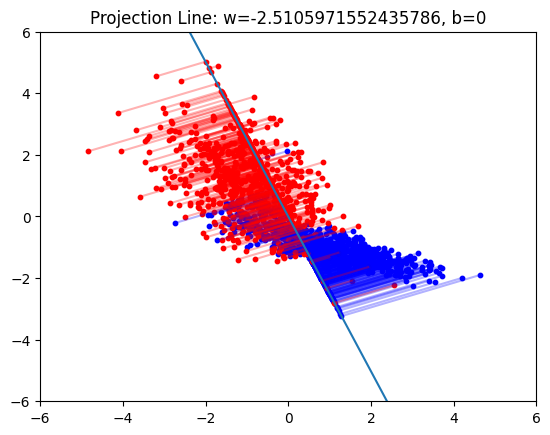

In [138]:
import matplotlib.pyplot as plt

y_pred = np.array(predict(x_test=x_test, K=5))  

# y0, y1 = [], []
# for i in range(y_pred.shape[0]):
#     if y_pred[i] == 0:
#         y0.append(x_test[i])
#     else:
#         y1.append(x_test[i])

# y0 = np.array(y0).T
# y1 = np.array(y1).T
intercept = 0
test_c1, test_c2 = [], []
for i in range(x_test.shape[0]):
    if y_test[i] == 0:
        test_c1.append(x_test[i])
    else:
        test_c2.append(x_test[i])

test_c1 = np.array(test_c1).T
test_c2 = np.array(test_c2).T

project_length_c1 = np.dot(w.T, test_c1)
project_length_c2 = np.dot(w.T, test_c2)

project_vector_c1 = test_c1 - np.dot(w, project_length_c1)
project_vector_c2 = test_c2 - np.dot(w, project_length_c2)


project_c1 = test_c1 - project_vector_c1
project_c2 = test_c2 - project_vector_c2


slope = np.squeeze(w[1]) / np.squeeze(w[0])

axes = plt.gca()
CANVAS = 6
axes.set_xlim(-CANVAS, CANVAS)
axes.set_ylim(-CANVAS, CANVAS)
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals


x_proj_line_c1 = [test_c1[0], project_c1[0]]
y_proj_line_c1 = [test_c1[1], project_c1[1]]

x_proj_line_c2 = [test_c2[0], project_c2[0]]
y_proj_line_c2 = [test_c2[1], project_c2[1]]



plt.scatter(test_c1[0], test_c1[1], color='blue', s=10)
plt.scatter(project_c1[0], project_c1[1], color='blue', s=10)
plt.plot(x_proj_line_c1, y_proj_line_c1, color='blue', alpha=0.3)

plt.scatter(test_c2[0], test_c2[1], color='red', s=10)
plt.scatter(project_c2[0], project_c2[1], color='red', s=10)
plt.plot(x_proj_line_c2, y_proj_line_c2, color='red', alpha=0.3)

plt.title(f"Projection Line: w={slope}, b={intercept}")
plt.plot(x_vals, y_vals, '-')